In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , Perceptron 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier  , GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pickle

: 

In [2]:
data = pd.read_csv("D:\\archive (10)\\train.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
data.isnull().sum() ## There are 310 Null Values Present in the Arrival Delay in Minutes

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
data.duplicated().sum() ## No Duplicate Values are Present 

0

In [7]:
## Dropping the Null Values is Better Option as very less values are missing in our dataset
data.dropna(inplace = True)

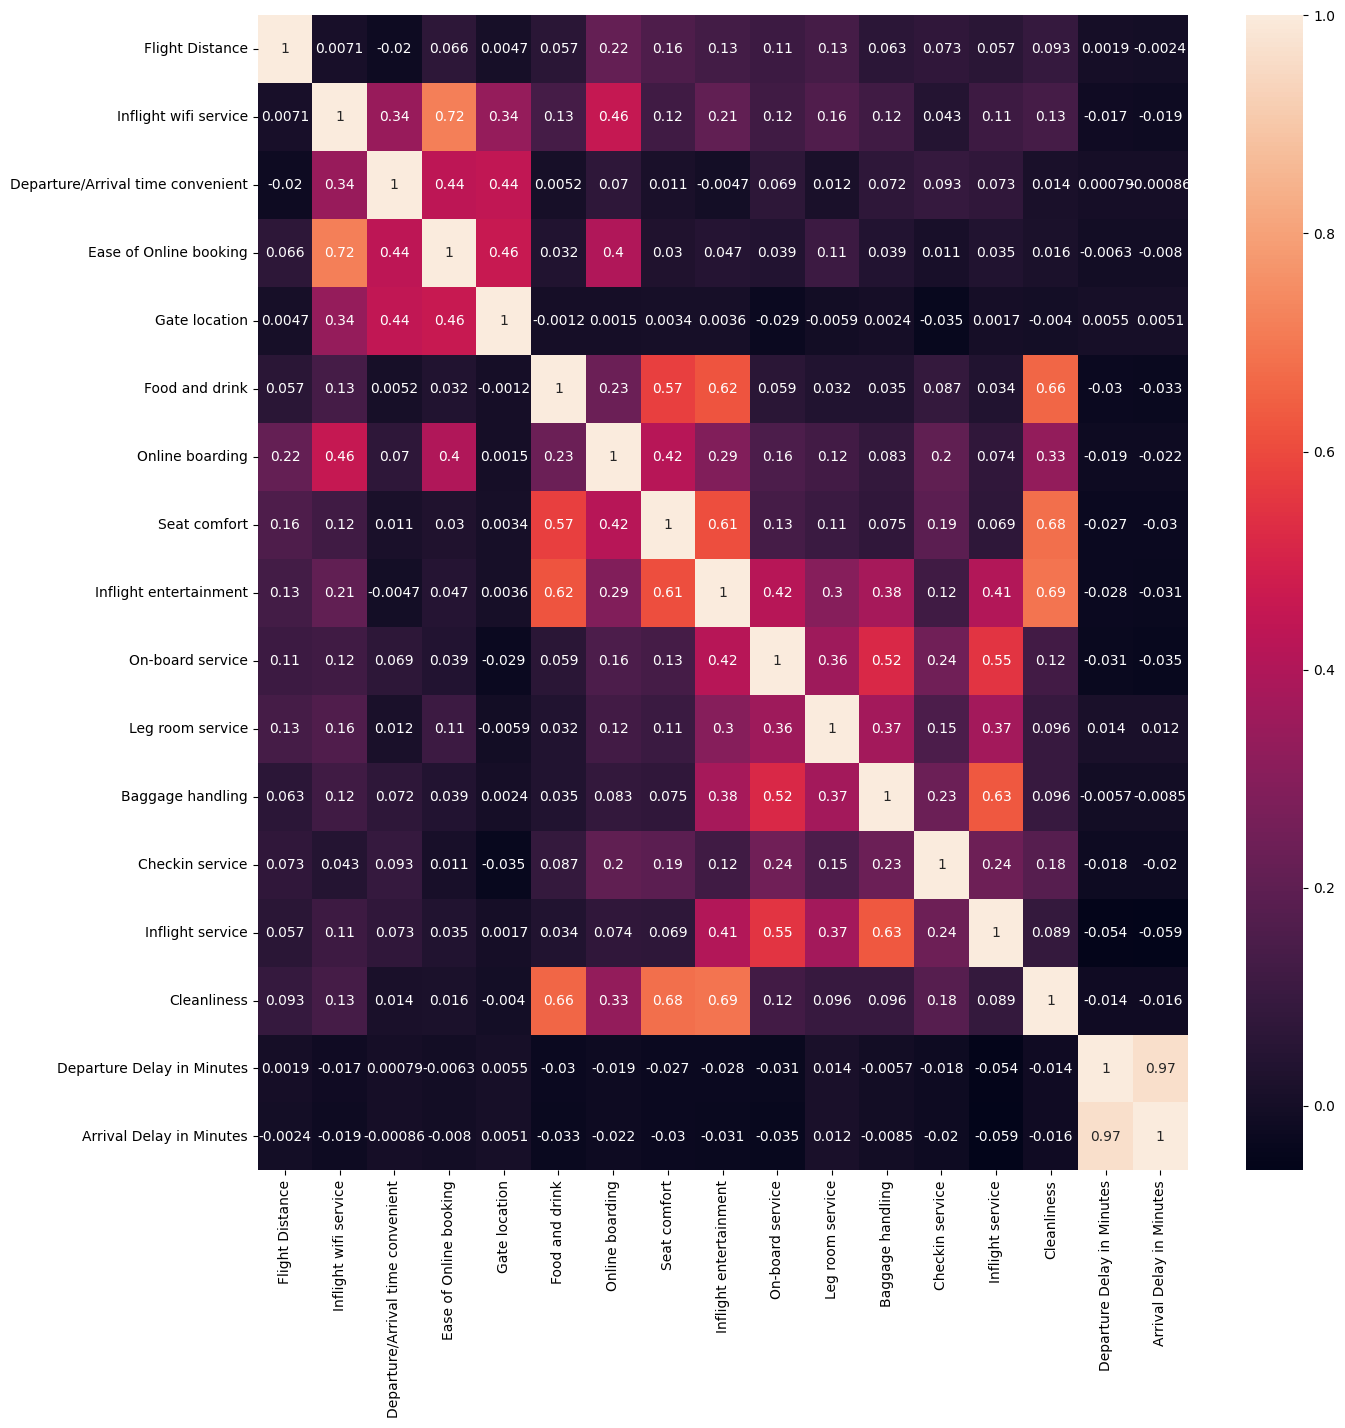

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,7:24].corr(),annot=True)
plt.show()

## Feature Selection

In [9]:
## Checking for Duplicated Column 

In [10]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttrbuteError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [11]:
duplicate_columns = get_duplicate_columns(data)

In [12]:
duplicate_columns ### No duplicate Columns are present 

{}

In [13]:
### checking for the columns whose correlation with another column is greater than 0.95 or less than -0.95

In [14]:
corr_data = data.iloc[:,7:24].corr() ## Strores correlation data

In [15]:
columns = corr_data.columns
dictionary_correlated = {}
corr_columns_95 = []
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if corr_data.iloc[i,j] >= 0.95 :
            corr_columns_95.append(columns[j])
            dictionary_correlated[columns[i]] = columns[j]
columns_need_to_delete = set(corr_columns_95)

In [16]:
dictionary_correlated    ## Departure Delay is highly correlated with arrival delay 

{'Departure Delay in Minutes': 'Arrival Delay in Minutes'}

In [17]:
columns_need_to_delete    ## Delete this column

{'Arrival Delay in Minutes'}

In [18]:
#### checking for the columns those donot have variance spread > 0.05 

In [19]:
vth = VarianceThreshold(threshold=0.05)
vth.fit(data.iloc[:,7:24])
bool_columns = vth.get_support()
## get_support : Returns False and True(True for columns threshold > 0.05)
columns = (data.iloc[:,7:24].columns[bool_columns==False])
## Columns contains Column Names extracted using boolean indexing

In [20]:
columns  ## No columns are there with variance thresshold less than 0.05

Index([], dtype='object')

In [21]:
''' giving True i.e, all values present in the id are unique values no repetaion present 
 So dropping the id column dosent affect the prediction model'''
print(data['id'].nunique() == data.shape[0] )

True


In [22]:
## Unnamed: 0 column is a unusable column

In [23]:
Total_Columns_need_deletion = ['Arrival Delay in Minutes','id','Unnamed: 0']

##### Deletion of Columns

In [24]:
data.drop(columns = Total_Columns_need_deletion , inplace = True)

In [25]:
data.shape ## Shape of the Data After Deletion

(103594, 22)

In [26]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


###### Exploratory Data Analysis w.r.to Satisfaction Column

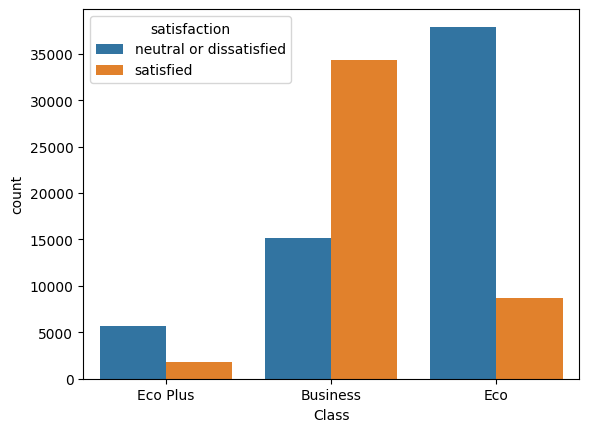

In [27]:
sns.countplot(data = data , x = 'Class' , hue = 'satisfaction')
plt.show()

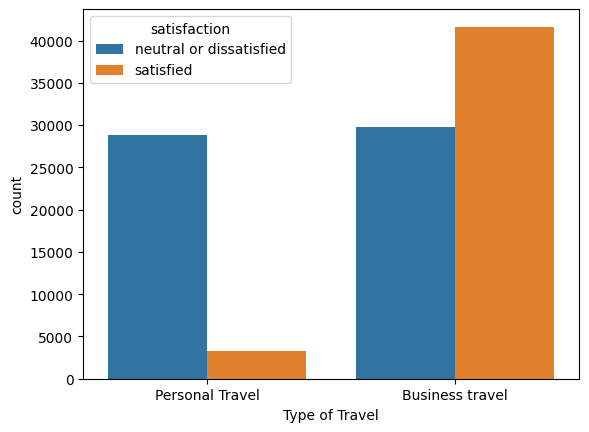

In [28]:
sns.countplot(data = data , x = 'Type of Travel' , hue = 'satisfaction')
plt.show()

In [29]:
### Below pieces of code gives average rating given by the satisfied people vs un satisfied people w.r.to each of the Services 
## Provided by respective airlines

In [30]:
rating_columns = data.columns[6:20]

In [31]:
rating_columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [32]:
data.groupby('satisfaction')[rating_columns].mean() 

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
satisfaction,,,,,,,,,,,,,,
neutral or dissatisfied,2.399748,3.129070,2.547149,2.976524,2.958362,2.656337,3.037072,2.894100,3.019303,2.991107,3.375709,3.043239,3.389015,2.936317
satisfied,3.161191,2.969887,3.031316,2.977682,3.520814,4.027285,3.966234,3.965276,3.857585,3.822438,3.966345,3.645656,3.969887,3.744081


###### Encoding Target Column for EDA

In [33]:
## Using Label Encoder 

In [34]:
labelencoder = LabelEncoder()

In [35]:
data['satisfaction'] = labelencoder.fit_transform(data['satisfaction'])

In [36]:
labelencoder.inverse_transform([1]) , labelencoder.inverse_transform([0])

(array(['satisfied'], dtype=object),
 array(['neutral or dissatisfied'], dtype=object))

## Exploratory Data Analysis 

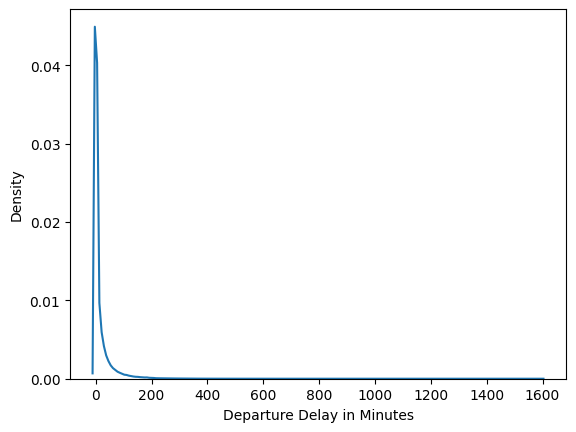

In [37]:
sns.kdeplot(data['Departure Delay in Minutes'])
plt.show()

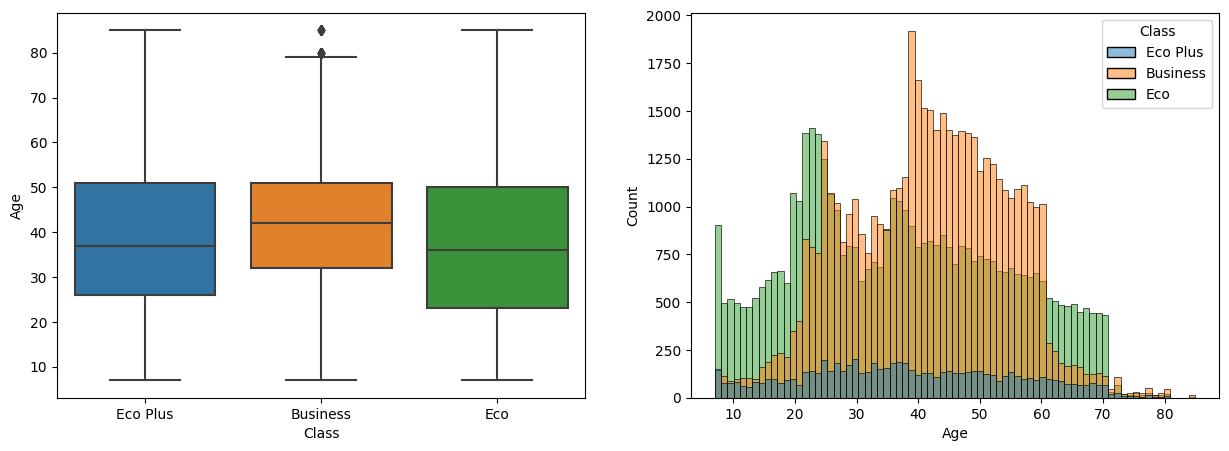

In [38]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", ax = ax[1])
plt.show()

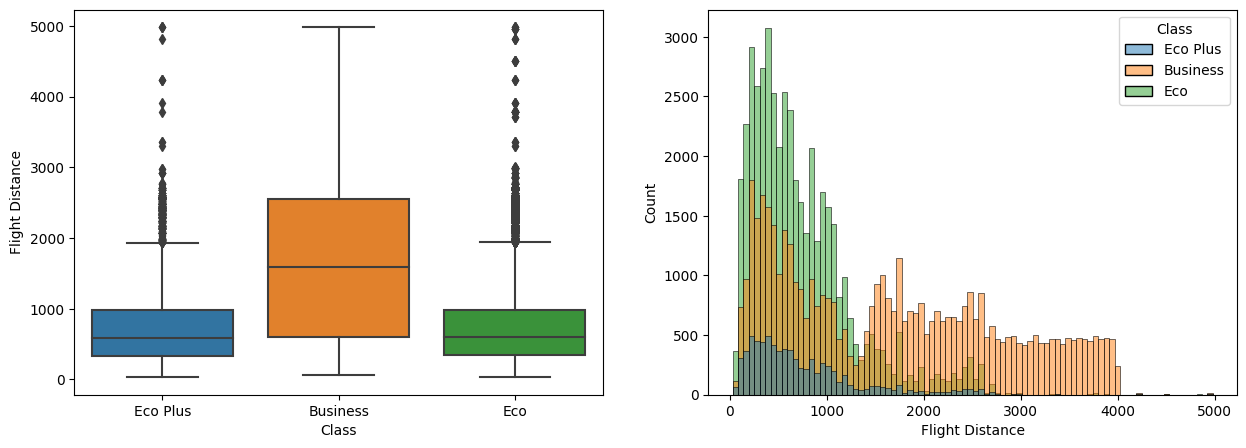

In [39]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", ax = ax[1])
plt.show()

In [40]:
data['Overall Satisfaction']= round(data[rating_columns].sum(axis=1) / len(rating_columns)).astype(int)

In [41]:
def satisfaction_lvl(x):
    if x in range(0,2):
        return 'Angry Customer'
    elif x in range(2,3):
        return 'Less Angry'
    elif x in range(3,4):
        return 'Average'
    else:
        return 'We are cool!'
data['satisfaction_lvl']=data['Overall Satisfaction'].apply(satisfaction_lvl)

In [42]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Overall Satisfaction,satisfaction_lvl
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,0,4,We are cool!
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,0,2,Less Angry
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,1,4,We are cool!
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,0,3,Average
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,1,4,We are cool!


In [43]:
data.pivot_table(columns='satisfaction_lvl',index = 'Gender' , values = 'Overall Satisfaction', aggfunc=len)
## This table shows information about distribution of people among different satisfaction level

satisfaction_lvl,Angry Customer,Average,Less Angry,We are cool!
Gender,,,,
Female,67,24346,8402,19761
Male,68,23445,7791,19714


In [44]:
## From this table we came to conclusion that more number of males and females are going to be satisfied averagely i.e 
## rating is between 3-4 

In [45]:
data.pivot_table(columns='satisfaction_lvl',index = 'Type of Travel' , values = 'Overall Satisfaction', aggfunc=len)

satisfaction_lvl,Angry Customer,Average,Less Angry,We are cool!
Type of Travel,,,,
Business travel,113,29932,11109,30311
Personal Travel,22,17859,5084,9164


In [46]:
## From this table we came to conclusion that more number of peoples from Buisiness travel are going to be highly satisfied 
## while people from Personal travel are going to be averagely satisfied

In [47]:
data.pivot_table(columns='satisfaction_lvl',index = 'Class' , values = 'Overall Satisfaction', aggfunc=len)

satisfaction_lvl,Angry Customer,Average,Less Angry,We are cool!
Class,,,,
Business,60,18719,5586,25168
Eco,58,25254,9043,12238
Eco Plus,17,3818,1564,2069


In [48]:
## From this table we came to conclusion that more number of peoples from Buisiness Class are going to be highly satisfied 
## while people from Eco and Eco Plus class  are going to be averagely satisfied

In [49]:
data.pivot_table(columns='satisfaction_lvl',index = 'Customer Type' , values = 'Overall Satisfaction', aggfunc=len)

satisfaction_lvl,Angry Customer,Average,Less Angry,We are cool!
Customer Type,,,,
Loyal Customer,117,37520,12280,34745
disloyal Customer,18,10271,3913,4730


In [50]:
## From this tablw we came to conclusion that more number of Loyal Customers are going to be satisfied highly and averagely 
## While in case of people from disloyal customer are going to be averagely satisfied only

In [51]:
## Now drop those two columns of Overall Satisfaction and satisfaction level

In [52]:
data.drop(columns = ['satisfaction_lvl','Overall Satisfaction'],inplace = True)

#### Average Rating of Each Service

In [53]:
data.groupby('Gender')[rating_columns].mean() 

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Gender,,,,,,,,,,,,,,
Female,2.718027,3.046789,2.747109,2.976757,3.194652,3.306528,3.474380,3.350369,3.372432,3.310142,3.588253,3.291312,3.595671,3.278074
Male,2.741836,3.073778,2.767161,2.977302,3.209828,3.192755,3.404093,3.366557,3.393097,3.393920,3.676448,3.317731,3.687228,3.294974


In [54]:
data.groupby('Type of Travel')[rating_columns].mean() 

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Type of Travel,,,,,,,,,,,,,,
Business travel,2.823130,2.794361,2.882110,3.003414,3.258392,3.453733,3.549416,3.490604,3.431386,3.473714,3.656517,3.289862,3.658490,3.355699
Personal Travel,2.522052,3.651125,2.478664,2.918329,3.076971,2.798438,3.195867,3.064148,3.274114,3.079336,3.576457,3.336487,3.601326,3.132248


In [55]:
data.groupby('Class')[rating_columns].mean() 

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775221,2.905820,2.914077,2.983042,3.322835,3.716411,3.760786,3.635395,3.679608,3.644661,3.842812,3.518987,3.844447,3.477439
Eco,2.675316,3.199043,2.605091,2.972228,3.086451,2.812933,3.139399,3.098470,3.120834,3.086129,3.450153,3.122250,3.464791,3.108278
Eco Plus,2.767809,3.216256,2.662694,2.967059,3.123192,2.890198,3.184521,3.142073,3.045929,3.061328,3.363953,3.016470,3.387654,3.130557


In [56]:
data.groupby('Customer Type')[rating_columns].mean() 

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Customer Type,,,,,,,,,,,,,,
Loyal Customer,2.734592,3.209386,2.769968,2.973223,3.239564,3.371406,3.539380,3.427748,3.416952,3.381139,3.617786,3.323510,3.627944,3.338369
disloyal Customer,2.708113,2.392404,2.698922,2.994031,3.034703,2.709804,2.994295,3.047961,3.229030,3.218413,3.693852,3.218519,3.698077,3.053983


#### Following Pie Charts provides distribution of  Type of Persons and Classes VS Respective Services Provided by Airlines

                         Gender vs Distribution Percentage of Each Service provided



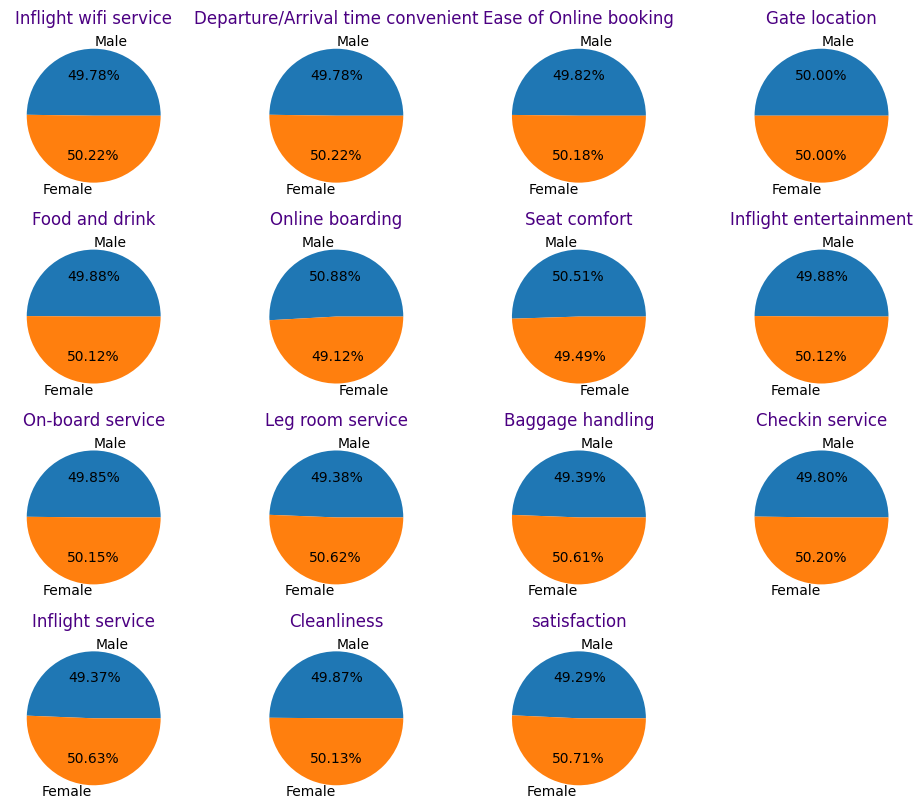

In [57]:
count = 1
plt.figure(figsize=(12,10))
print('                         Gender vs Distribution Percentage of Each Service provided')
print()
for i in range(len(rating_columns)):
    plt.subplot(4,4,count)
    plt.pie(data.groupby('Gender')[rating_columns[i]].mean(),labels=data['Gender'].unique(),autopct='%.2f%%')
    plt.title(rating_columns[i],color = 'indigo')
    count += 1
plt.subplot(4,4,count)
plt.pie(data.groupby('Gender')['satisfaction'].mean(),labels=data['Gender'].unique(),autopct='%.2f%%')
plt.title('satisfaction',color = 'indigo')
plt.show()

                         Type of Travel vs Distribution Percentage of Each Service provided



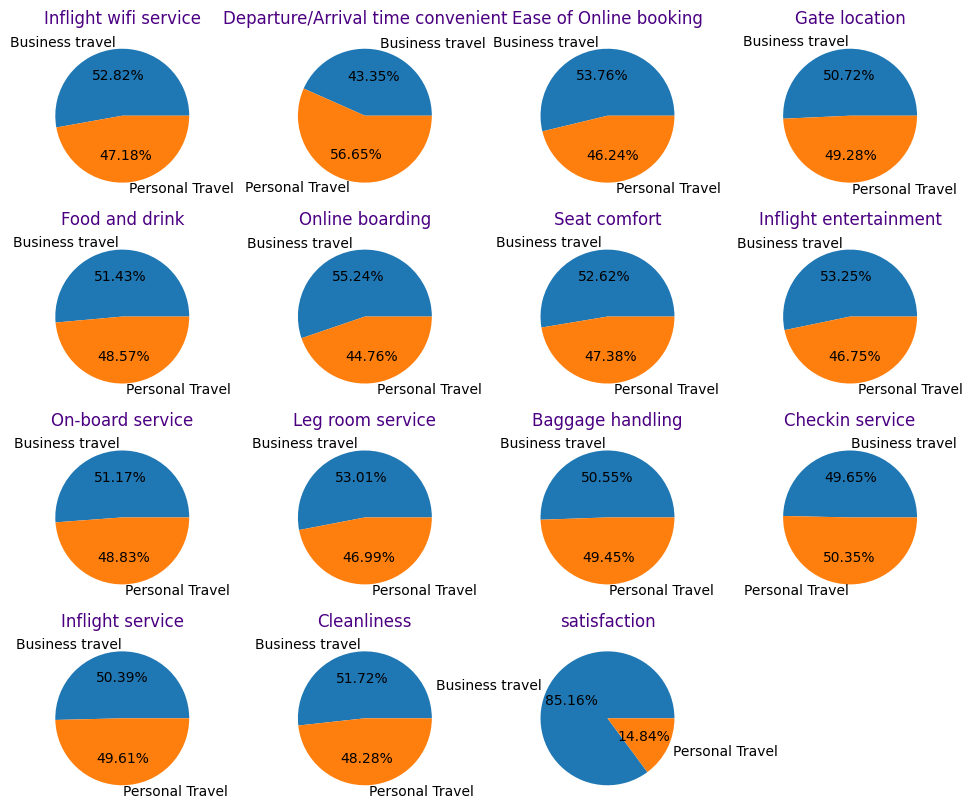

In [58]:
count = 1
plt.figure(figsize=(12,10))
print('                         Type of Travel vs Distribution Percentage of Each Service provided')
print()
for i in range(len(rating_columns)):
    plt.subplot(4,4,count)
    plt.pie(data.groupby('Type of Travel')[rating_columns[i]].mean(),labels=data['Type of Travel'].unique()[::-1],autopct='%.2f%%')
    plt.title(rating_columns[i],color = 'indigo')
    count += 1
plt.subplot(4,4,count)
plt.pie(data.groupby('Type of Travel')['satisfaction'].mean(),labels=data['Type of Travel'].unique()[::-1],autopct='%.2f%%')
plt.title('satisfaction',color = 'indigo')
plt.show()

                         Customer Type vs Distribution Percentage of Each Service provided



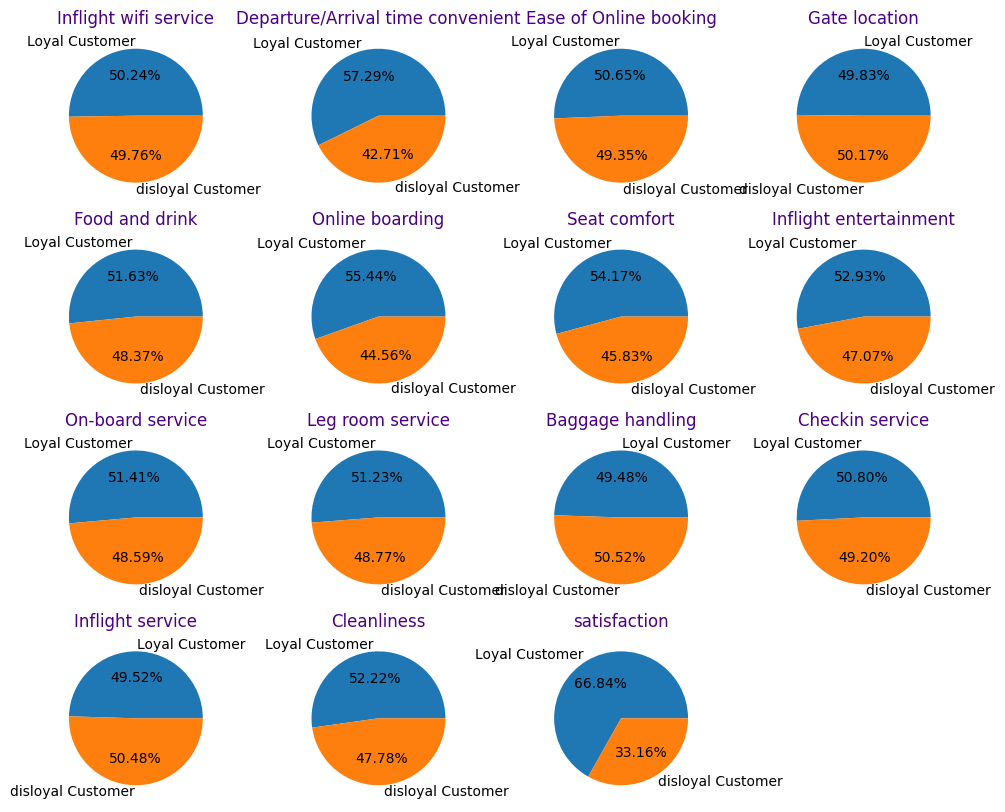

In [59]:
count = 1
plt.figure(figsize=(12,10))
print('                         Customer Type vs Distribution Percentage of Each Service provided')
print()
for i in range(len(rating_columns)):
    plt.subplot(4,4,count)
    plt.pie(data.groupby('Customer Type')[rating_columns[i]].mean(),labels=data['Customer Type'].unique(),autopct='%.2f%%')
    plt.title(rating_columns[i],color = 'indigo')
    count += 1
plt.subplot(4,4,count)
plt.pie(data.groupby('Customer Type')['satisfaction'].mean(),labels=data['Customer Type'].unique(),autopct='%.2f%%')
plt.title('satisfaction',color = 'indigo')
plt.show()

                         Class Type vs Distribution Percentage of Each Service provided



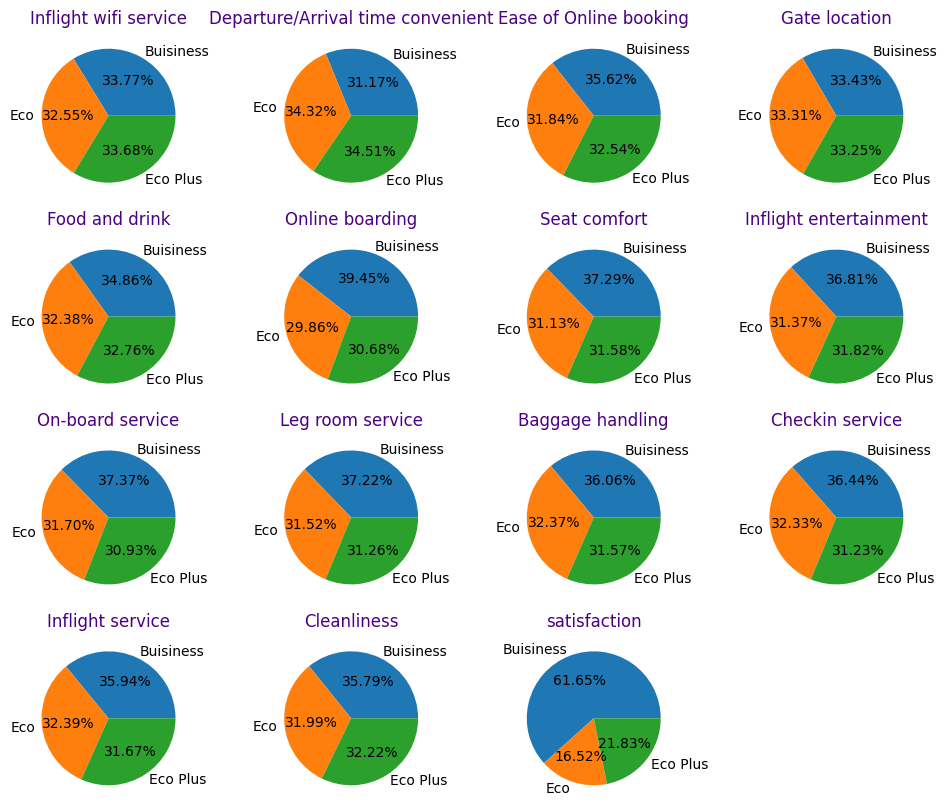

In [60]:
count = 1
plt.figure(figsize=(12,10))
print('                         Class Type vs Distribution Percentage of Each Service provided')
print()
for i in range(len(rating_columns)):
    plt.subplot(4,4,count)
    plt.pie(data.groupby('Class')[rating_columns[i]].mean(),labels=['Buisiness','Eco','Eco Plus'],autopct='%.2f%%')
    plt.title(rating_columns[i],color = 'indigo')
    count += 1
plt.subplot(4,4,count)
plt.pie(data.groupby('Class')['satisfaction'].mean(),labels=['Buisiness','Eco','Eco Plus'],autopct='%.2f%%')
plt.title('satisfaction',color = 'indigo')
plt.show()

#### Dividing Data for Training and Testing 

In [124]:
x_train , x_test , y_train , y_test = train_test_split(data.iloc[:,:21] , data.iloc[:,-1],train_size = 0.6 , random_state=42)

In [125]:
x_train.shape , y_train.shape

((62156, 21), (62156,))

In [126]:
x_test.shape , y_test.shape

((41438, 21), (41438,))

In [127]:
print(x_train.columns)
print(y_train.name)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')
satisfaction


### Encoding Categorical Data

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103594 non-null  object
 1   Customer Type                      103594 non-null  object
 2   Age                                103594 non-null  int64 
 3   Type of Travel                     103594 non-null  object
 4   Class                              103594 non-null  object
 5   Flight Distance                    103594 non-null  int64 
 6   Inflight wifi service              103594 non-null  int64 
 7   Departure/Arrival time convenient  103594 non-null  int64 
 8   Ease of Online booking             103594 non-null  int64 
 9   Gate location                      103594 non-null  int64 
 10  Food and drink                     103594 non-null  int64 
 11  Online boarding                    103594 non-null  int64

In [129]:
## From above we came to know that Gender , Customer Type , Type of Travel , Class are the categorical Columns

In [130]:
## Encode Gender and Customer Type with One Hot Encoding

In [131]:
one_hot_encoder_Gender = OneHotEncoder(drop='first')
one_hot_encoder_Customer_Type = OneHotEncoder(drop='first')

In [132]:
x_train['Gender'] = one_hot_encoder_Gender.fit_transform(x_train['Gender'].values.reshape(-1,1)).toarray()

In [133]:
x_test['Gender'] = one_hot_encoder_Gender.transform(x_test['Gender'].values.reshape(-1,1)).toarray()

In [134]:
x_train['Customer Type'] = one_hot_encoder_Customer_Type.fit_transform(x_train['Customer Type'].values.reshape(-1,1)).toarray()

In [135]:
x_test['Customer Type'] = one_hot_encoder_Customer_Type.transform(x_test['Customer Type'].values.reshape(-1,1)).toarray()

In [136]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62156 entries, 33673 to 15832
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             62156 non-null  float64
 1   Customer Type                      62156 non-null  float64
 2   Age                                62156 non-null  int64  
 3   Type of Travel                     62156 non-null  object 
 4   Class                              62156 non-null  object 
 5   Flight Distance                    62156 non-null  int64  
 6   Inflight wifi service              62156 non-null  int64  
 7   Departure/Arrival time convenient  62156 non-null  int64  
 8   Ease of Online booking             62156 non-null  int64  
 9   Gate location                      62156 non-null  int64  
 10  Food and drink                     62156 non-null  int64  
 11  Online boarding                    62156 non-null  int6

In [137]:
## Use Ordinal Encoder for Type of Travel and Cass of Travel 
## as we need to give some importance to Buisiness class followed by Eco plus followed by Eco 
## and we need to give some importance to 'Buisiness Travel' compoared with personal Travel 

In [138]:
## Encoding the Type of Travel feature

In [139]:
ordinal_encoder = OrdinalEncoder(categories=[['Personal Travel','Business travel']])

In [140]:
x_train['Type of Travel'] = ordinal_encoder.fit_transform(x_train.iloc[:,3].values.reshape(-1,1))

In [141]:
x_test['Type of Travel'] = ordinal_encoder.fit_transform(x_test.iloc[:,3].values.reshape(-1,1))

In [142]:
## Encoding for Class Feature

In [143]:
ordinal_encoder2 = OrdinalEncoder(categories=[['Eco','Eco Plus','Business']])

In [144]:
x_train['Class'] = ordinal_encoder2.fit_transform(x_train.iloc[:,4].values.reshape(-1,1))

In [145]:
x_test['Class'] = ordinal_encoder2.fit_transform(x_test.iloc[:,4].values.reshape(-1,1))

In [146]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62156 entries, 33673 to 15832
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             62156 non-null  float64
 1   Customer Type                      62156 non-null  float64
 2   Age                                62156 non-null  int64  
 3   Type of Travel                     62156 non-null  float64
 4   Class                              62156 non-null  float64
 5   Flight Distance                    62156 non-null  int64  
 6   Inflight wifi service              62156 non-null  int64  
 7   Departure/Arrival time convenient  62156 non-null  int64  
 8   Ease of Online booking             62156 non-null  int64  
 9   Gate location                      62156 non-null  int64  
 10  Food and drink                     62156 non-null  int64  
 11  Online boarding                    62156 non-null  int6

In [147]:
x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
33673,0.0,0.0,36,1.0,2.0,517,2,2,5,2,...,3,1,5,5,5,5,3,5,4,11
57181,0.0,0.0,53,1.0,2.0,2275,4,4,4,4,...,3,1,5,5,5,5,2,5,1,0
69840,0.0,0.0,46,1.0,2.0,2426,1,1,1,1,...,5,5,4,4,4,4,5,4,5,11
61244,1.0,0.0,27,0.0,0.0,337,3,4,2,2,...,2,5,5,5,5,5,3,5,5,121
99926,1.0,0.0,51,1.0,2.0,1990,3,3,3,3,...,5,5,5,3,3,5,5,3,5,157


### Training Machine Learning Model 

In [93]:
models = {
    'Perceptron' : Perceptron(),
    'LogisticRegression' : LogisticRegression(max_iter=5000),
    'SVC' : SVC(),
    'GaussianNB':GaussianNB(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier()
}

In [94]:
accuracyscore = {}

In [95]:
for key in models:
    model = models[key]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracyscore[key] = accuracy_score(y_pred,y_test)

Learning rate set to 0.060083
0:	learn: 0.6120883	total: 18.5ms	remaining: 18.5s
1:	learn: 0.5489682	total: 36.7ms	remaining: 18.3s
2:	learn: 0.4707088	total: 56.3ms	remaining: 18.7s
3:	learn: 0.4182844	total: 75.3ms	remaining: 18.7s
4:	learn: 0.3826581	total: 94.6ms	remaining: 18.8s
5:	learn: 0.3517969	total: 114ms	remaining: 18.9s
6:	learn: 0.3276593	total: 132ms	remaining: 18.8s
7:	learn: 0.3078622	total: 152ms	remaining: 18.8s
8:	learn: 0.2905913	total: 171ms	remaining: 18.9s
9:	learn: 0.2791278	total: 191ms	remaining: 18.9s
10:	learn: 0.2649148	total: 211ms	remaining: 19s
11:	learn: 0.2501543	total: 231ms	remaining: 19s
12:	learn: 0.2414175	total: 251ms	remaining: 19.1s
13:	learn: 0.2294927	total: 271ms	remaining: 19.1s
14:	learn: 0.2209356	total: 290ms	remaining: 19s
15:	learn: 0.2152940	total: 309ms	remaining: 19s
16:	learn: 0.2071804	total: 328ms	remaining: 18.9s
17:	learn: 0.2007988	total: 348ms	remaining: 19s
18:	learn: 0.1959303	total: 367ms	remaining: 19s
19:	learn: 0.19093

In [96]:
accuracyscore

{'Perceptron': 0.5890004343838988,
 'LogisticRegression': 0.8709638496066412,
 'SVC': 0.668203098605145,
 'GaussianNB': 0.8635793233264154,
 'DecisionTreeClassifier': 0.9426854577923645,
 'RandomForestClassifier': 0.9607606544717409,
 'AdaBoostClassifier': 0.9264925913412809,
 'GradientBoostingClassifier': 0.9398860948887494,
 'XGBClassifier': 0.961581157391766,
 'CatBoostClassifier': 0.9635117524977074}

In [112]:
### From the above model we came to know that CatBoostClassifier performing best among all amchine learning models

In [205]:
pkl_file = 'D:\CatBoostModelSatisfactionPrediction.pkl'
one_hot_gender_file = 'D:\one_hot_gender.pkl'
one_hot_customer_file = 'D:\one_hot_customer.pkl'
ordinal_tpe_of_travel_file = 'D:\ordinal_type_of_travel.pkl'
ordinal_class_of_travel_file = 'D:\ordinal_class_of_travel.pkl'
labelencoder_file = 'D:\label_encoder_file.pkl'

In [151]:
with open(pkl_file, "wb") as fp:
    pickle.dump(models['CatBoostClassifier'], fp)

In [152]:
with open(one_hot_gender_file, "wb") as fp:
    pickle.dump(one_hot_encoder_Gender, fp)

In [153]:
with open(one_hot_customer_file, "wb") as fp:
    pickle.dump(one_hot_encoder_Customer_Type, fp)

In [154]:
with open(ordinal_tpe_of_travel_file, "wb") as fp:
    pickle.dump(ordinal_encoder, fp)

In [155]:
with open(ordinal_class_of_travel_file, "wb") as fp:
    pickle.dump(ordinal_encoder2, fp)

In [206]:
with open(labelencoder_file, "wb") as fp:
    pickle.dump(labelencoder, fp)

## UserPrediction

In [159]:
## Loading Pickle Files

In [160]:
# Open the files in binary read mode
with open('D:\\one_hot_gender.pkl', 'rb') as file:
    gender_encoding = pickle.load(file)

with open('D:\\one_hot_customer.pkl', 'rb') as file:
    customer_type_encoding = pickle.load(file)

with open('D:\\ordinal_type_of_travel.pkl', 'rb') as file:
    type_of_travel_encoding = pickle.load(file)

with open('D:\\ordinal_class_of_travel.pkl', 'rb') as file:
    class_of_travel_encoding = pickle.load(file)

with open('D:\\CatBoostModelSatisfactionPrediction.pkl', 'rb') as file:
    prediction_model = pickle.load(file)


In [207]:
with open(labelencoder_file, 'rb') as file:
    lebel_encoder = pickle.load(file)

In [212]:
user_input = {
    'Gender' : 'Male',
    'Customer Type' : 'Loyal Customer',
    'Age':19,
    'Type of Travel': 'Business travel',
    'Class': 'Eco Plus' ,
    'Flight Distance': 879 ,
    'Inflight wifi service': 4 ,
    'Departure/Arrival time convenient': 5,
    'Ease of Online booking': 4,
    'Gate location': 4,
    'Food and drink': 2,
    'Online boarding': 4,
    'Seat comfort': 4,
    'Inflight entertainment': 4,
    'On-board service': 5,
    'Leg room service': 4,
    'Baggage handling': 5,
    'Checkin service': 5,
    'Inflight service': 5,
    'Cleanliness': 5,
    'Departure Delay in Minutes': 0
}

In [213]:
user_input

{'Gender': 'Male',
 'Customer Type': 'Loyal Customer',
 'Age': 19,
 'Type of Travel': 'Business travel',
 'Class': 'Eco Plus',
 'Flight Distance': 879,
 'Inflight wifi service': 4,
 'Departure/Arrival time convenient': 5,
 'Ease of Online booking': 4,
 'Gate location': 4,
 'Food and drink': 2,
 'Online boarding': 4,
 'Seat comfort': 4,
 'Inflight entertainment': 4,
 'On-board service': 5,
 'Leg room service': 4,
 'Baggage handling': 5,
 'Checkin service': 5,
 'Inflight service': 5,
 'Cleanliness': 5,
 'Departure Delay in Minutes': 0}

In [214]:
user_data = pd.DataFrame(user_input , index=[0])

In [218]:
user_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1.0,0.0,19,1.0,1.0,879,4,5,4,4,...,4,4,4,5,4,5,5,5,5,0


In [216]:
ct = ColumnTransformer(
    [('ohe1' , gender_encoding , ['Gender'] ),
     ('ohe2',customer_type_encoding , ['Customer Type']),
     ('Oe1' , type_of_travel_encoding , ['Type of Travel']),
     ('Oe2' , class_of_travel_encoding , ['Class']),
    ],
    remainder='passthrough'
)

In [191]:
transformed_user_input = ct.fit_transform(user_data)

In [217]:
user_data['Gender'] = gender_encoding.transform([user_data['Gender'].values]).toarray()
user_data['Customer Type'] = customer_type_encoding.transform([user_data['Customer Type'].values]).toarray()
user_data['Type of Travel'] = type_of_travel_encoding.transform(user_data['Type of Travel'].values.reshape(-1,1))
user_data['Class'] = class_of_travel_encoding.transform(user_data['Class'].values.reshape(-1,1))

In [219]:
labelencoder.inverse_transform(prediction_model.predict(user_data))[0]

'satisfied'